<a href="https://colab.research.google.com/github/kalucira/cirus/blob/main/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{KALUGANA CIRUS}$
<br>
$\textbf{ICTP-EAIFR}$
<br>
$\textbf{Masters in Geophysics}$
<br>
$\textbf{221003270}$
<br>
$\textbf{Observation and Computational Methods Course}$
<br>
$\textbf{10/05/2022}$

In [ ]:
%pylab inline
#let's ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

!apt-get -qq build-dep python3-cartopy
!pip uninstall -y shapely

!pip install --no-binary cartopy cartopy==0.17.0
import cartopy

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
deb-src https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/ /
W: Skipping acquire of configured file 'Sources' as repository 'https://developer.download.nvidia.com/compute/machine-learning/repos/ubu

In [ ]:
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.17.0
import cartopy

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
deb-src https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/ /
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports (these should be ok, but feel free to add what you need)
from obspy.clients.fdsn.client import Client
from obspy import Stream, UTCDateTime, read, read_inventory
from obspy.taup import TauPyModel, plot_travel_times
from obspy.geodetics.base import gps2dist_azimuth, kilometer2degrees
from obspy.signal.trigger import recursive_sta_lta, plot_trigger, coincidence_trigger, trigger_onset, ar_pick
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
import os
import pprint

In [ ]:
'''
This function is used for plotting of the seismograms. It is not needed, since the obspy already has
this functionality, but since we will be adding some elements to the plot, it makes it more convinient.
'''

def mpl_plot(stream, figsize=[12.0, 8.0], linewidth=1):
    if len(stream)==1:
        fig, ax = plt.subplots(nrows=len(stream), ncols=1, figsize=figsize)
        ax.plot(stream[0].times("matplotlib"), stream[0].data, "k-", linewidth=linewidth, label=stream[0].stats.station+'.'+stream[0].stats.channel)
        ax.legend(loc=2)
    else:
        fig, ax = plt.subplots(nrows=len(stream), ncols=1, figsize=figsize)
        for i, tr in zip(range(0,len(stream)), stream):
            ax[i].plot(tr.times("matplotlib"), tr.data, "k-", linewidth=linewidth, label=tr.stats.station+'.'+tr.stats.channel)
            ax[i].legend(loc=2)
            
def max_pos_finder(tr):
    max_val = tr.max()
    max_pos = np.where(tr.data == max_val)    
    
    return np.abs(max_val), max_pos[0]

# Compute the local magnitude
def local_mag(max_val, epi_dist=23.95):
    max_amplitude = max_val*100
    ml = np.log10(max_amplitude*1000) + 0.018 * epi_dist + 3.17
    return ml

#### 1. Exercise  
a) Download the global earthquake catalog from year 2000 to today for the earthquakes with Mag>7.5 and plot the earthquakes on the map. Use any provider you think its good.

In [ ]:
#Defining the client i.e IRIS.
client_global = Client("IRIS")

# Defining the start time and end time of the catalog
starttime = UTCDateTime(2000, 1, 1, 0, 0)
endtime = UTCDateTime(2022, 5, 10, 23, 59)

# Defining the minimum magnitude of required earthquakes 
minmag = 7.5

In [ ]:
# Executing the get_events call to obtain predefined catalog

cat1 = client_global.get_events(starttime, endtime, minmagnitude=minmag)
                     
print(cat1)

128 Event(s) in Catalog:
2021-11-28T10:52:14.652000Z |  -4.453,  -76.811 | 7.5  mww
2021-08-12T18:35:20.989000Z | -58.451,  -25.327 | 8.1  Mww
...
2000-05-04T04:21:18.720000Z |  -1.171, +123.540 | 7.6  Mw
2000-03-28T11:00:20.440000Z | +22.264, +143.718 | 7.6  Mw
To see all events call 'print(CatalogObject.__str__(print_all=True))'


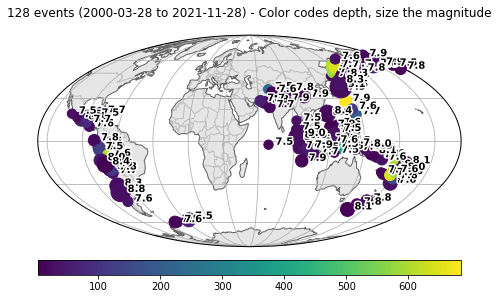

In [ ]:
'''
in the code, that we would write in a script, you can do this simply by
cat.plot(method='cartopy'). We assign this to cat_plot, so the plot is not displayed twice.
This happens when you call plot and return plot from the function at the same time.
'''
cat_plot = cat1.plot(method='cartopy')

b) Download the earthquake catalog of the 2016 Central Italy seismic sequence and plot it on the map. Use Italian institute for Geophysics and Vulcanology (INGV) as the data provider. Only download the data of the first two days of the sequence that started on 24th August, 2016.

Use these lat lon constrains:  
latitude: 42.12, 42.96  
longitude: 12.81, 13.67

Can you make a magnitude vs time plot of that day? You can grab a list of magnitudes and times of erathquakes with this lines: 

magnitudes = [event.magnitudes[0].mag for event in catalog]  
times = [event.origins[0].time.datetime for event in catalog]

Do you observe something interesting?

In [ ]:
#Defining the client i.e INGV
client2 = Client('INGV')

# Defining the start time and end time of the catalog
starttime = UTCDateTime(2016, 8, 24,0 , 0)
endtime = UTCDateTime(2016, 8, 25, 23, 59)

# Defining the area of interest.
min_lat, max_lat = 42.12, 42.96
min_lon, max_lon = 12.81, 13.67

In [ ]:
# Executing the get_events call to obtain predefined catalog
cat2 = client2.get_events(starttime, endtime, minlongitude=min_lon, maxlongitude=max_lon, minlatitude=min_lat, 
                          maxlatitude=max_lat)

print(cat2)

2739 Event(s) in Catalog:
2016-08-25T23:58:07.920000Z | +42.713,  +13.220 | 1.2 ML | manual
2016-08-25T23:55:32.350000Z | +42.663,  +13.291 | 1.5 ML | manual
...
2016-08-24T00:48:46.070000Z | +42.589,  +13.167 | 1.3 ML | manual
2016-08-24T00:10:27.290000Z | +42.577,  +13.274 | 1.1 ML | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


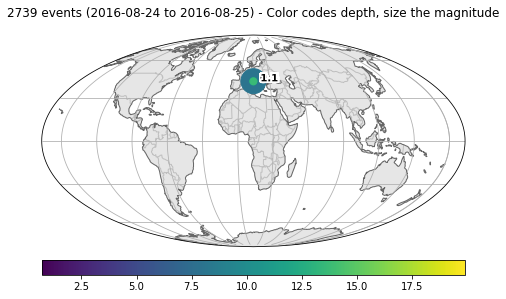

In [ ]:
# Plot of catalog on the world map

cat_plot = cat2.plot(method='cartopy')

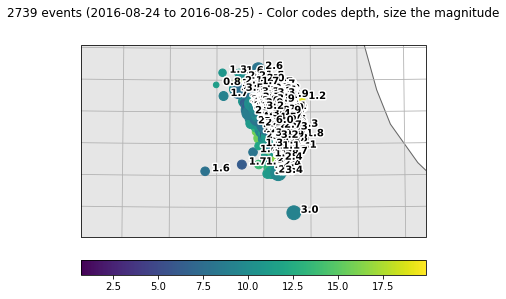

In [ ]:
# Plot of the catalog on a local scale

cat_plot_local = cat2.plot('local', 'h', method='cartopy')

In [ ]:
magnitudes = [event.magnitudes[0].mag for event in cat2]
times = [event.origins[0].time.datetime for event in cat2]

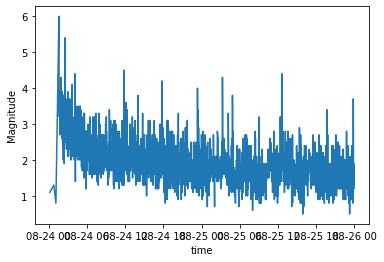

In [ ]:
plt.title('A plot of magnitude against time for the earthquakes')
plt.xlabel('time')
plt.ylabel('Magnitude') 
plt.plot(times,magnitudes)
plt.show()

$\textbf{Observation}$
<br>
<br>
There were a sequence of small magnitude earthquakes which were very localised according to the map. Their magnitude is observed to be generally reducing with time. This decaying sequence of magnitudes suggests that these earthquakes could induced from a volcanicity.

----------------------------------------
#### 2. Exercise  
Download the data for the 11th April 2021 in Central Italy on the selected stations:  
- CAMP
- NRCA
- TERO

Only download HHE, HHN and HHZ channels.

Use INGV as data provider. Find the correct Network code on the FDSN website under the name of 'Italian National Seismic Network'.  
Follow the steps in the Jupyter notebooks (Intro) we used during the lectures. 

**The downloading part of the code should be in a separate window, so you dont have to restart the downloade if you change the code later.**

In [ ]:
# Defining the network
net = 'IV'

# This time we will use a different provider (before it was ISC). Depands on the data we need.
client3 = Client('INGV')

# Defining stations
stations = ['CAMP','NRCA','TERO']

# Define the start time and end time of the catalog
starttime = UTCDateTime(2021, 4, 11, 0, 0)
endtime = UTCDateTime(2021, 4, 11, 23, 59)

#given time of the earthquake
giventime = UTCDateTime(2021, 4, 11, 21, 13, 47)

In [ ]:
#Executing to download the data of data.
CIta2 = client3.get_stations(starttime, endtime, network='IV', station='CAMP,NRCA,TERO',
                             channel='HHE,HHN,HHZ', level='response')

print(CIta2)

Inventory created at 2022-06-08T14:25:34.000000Z
	Created by: INGV-CNT WEB SERVICE: fdsnws-station | version: 1.1.48.5
		    http://webservices.ingv.it/fdsnws/station/1/query?channel=HHE%2CHHN...
	Sending institution: SeisNet-mysql (INGV-CNT)
	Contains:
		Networks (1):
			IV
		Stations (3):
			IV.CAMP (CAMPOTOSTO)
			IV.NRCA (NORCIA)
			IV.TERO (TERAMO)
		Channels (9):
			IV.CAMP..HHZ, IV.CAMP..HHN, IV.CAMP..HHE, IV.NRCA..HHZ, 
			IV.NRCA..HHN, IV.NRCA..HHE, IV.TERO..HHZ, IV.TERO..HHN, 
			IV.TERO..HHE


In [ ]:
#Saving the downloaded data for offline use

CIta2.write('HW_inv.xml', 'STATIONXML')

In [ ]:
# Generating an empty stream object for the downloaded data.
Original_st = Stream()

for sta in stations:
    print(sta)
    st = client3.get_waveforms(starttime=starttime, endtime=endtime, network='IV', location='*',
                               station='CAMP,NRCA,TERO', channel="HH*")
        
    for tr in st:
        Original_st += tr

print(Original_st)

CAMP
NRCA
TERO
225 Trace(s) in Stream:

IV.CAMP..HHE | 2021-04-11T00:00:00.000000Z - 2021-04-11T02:44:13.990000Z | 100.0 Hz, 985400 samples
...
(223 other traces)
...
IV.NRCA..HHZ | 2021-04-11T00:00:00.000200Z - 2021-04-11T23:59:00.000200Z | 100.0 Hz, 8634001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [ ]:
# Saving the downloaded stream
output_fld = 'HWwfs_dl/'

if not os.path.exists(output_fld):
    os.makedirs(output_fld)

for tr in Original_st:
    tr.write(output_fld+tr.stats.station+'_'+tr.stats.channel+'.'+'mseed', format='MSEED')

Plot the data and make see where the earthquake is.

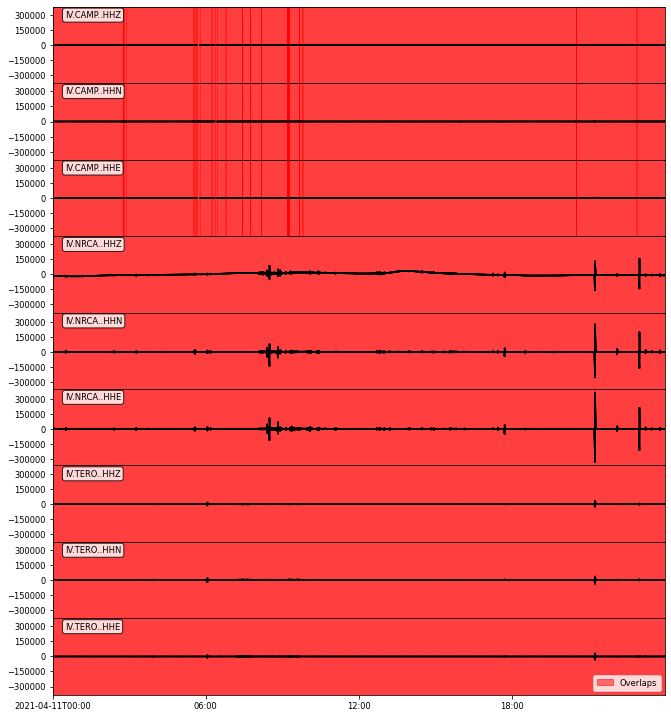

In [ ]:
fig = Original_st.plot(fig=plt.figure(figsize=[10, 10], linewidth=1))

**Create a copy of your stream that you downloaded, and work on the copy, or you will break the original data. It is a good thing to do to always work on a copy!**

In [ ]:
Original_st_cpy = Original_st.copy()

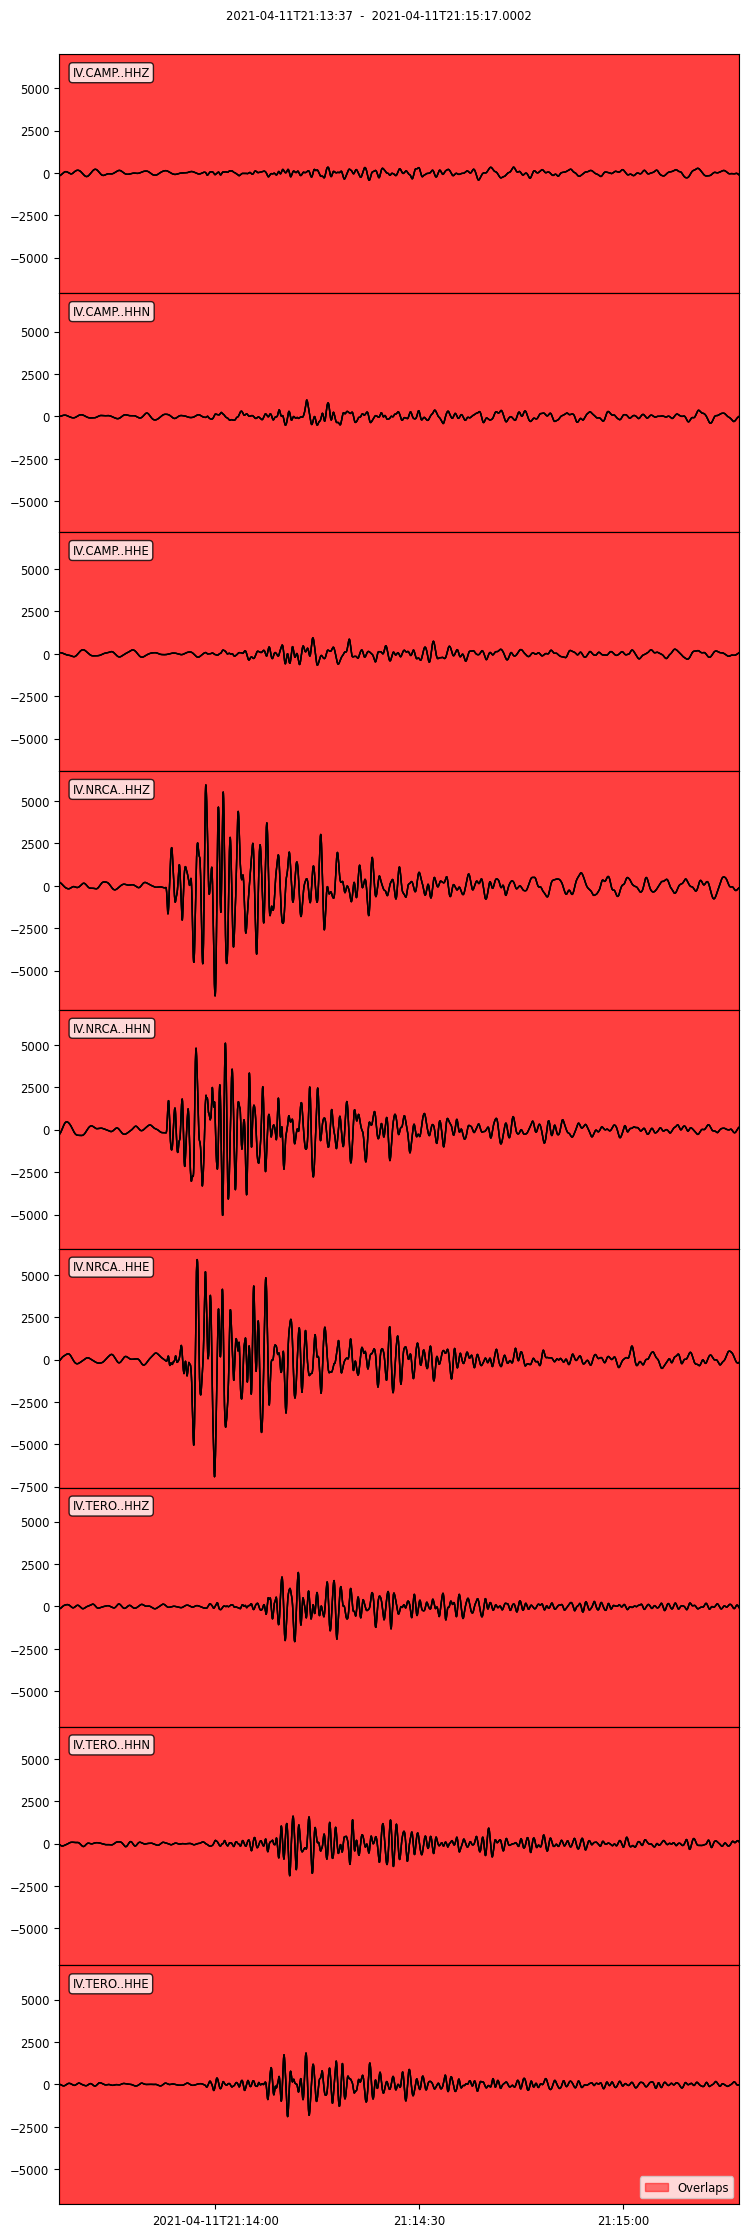

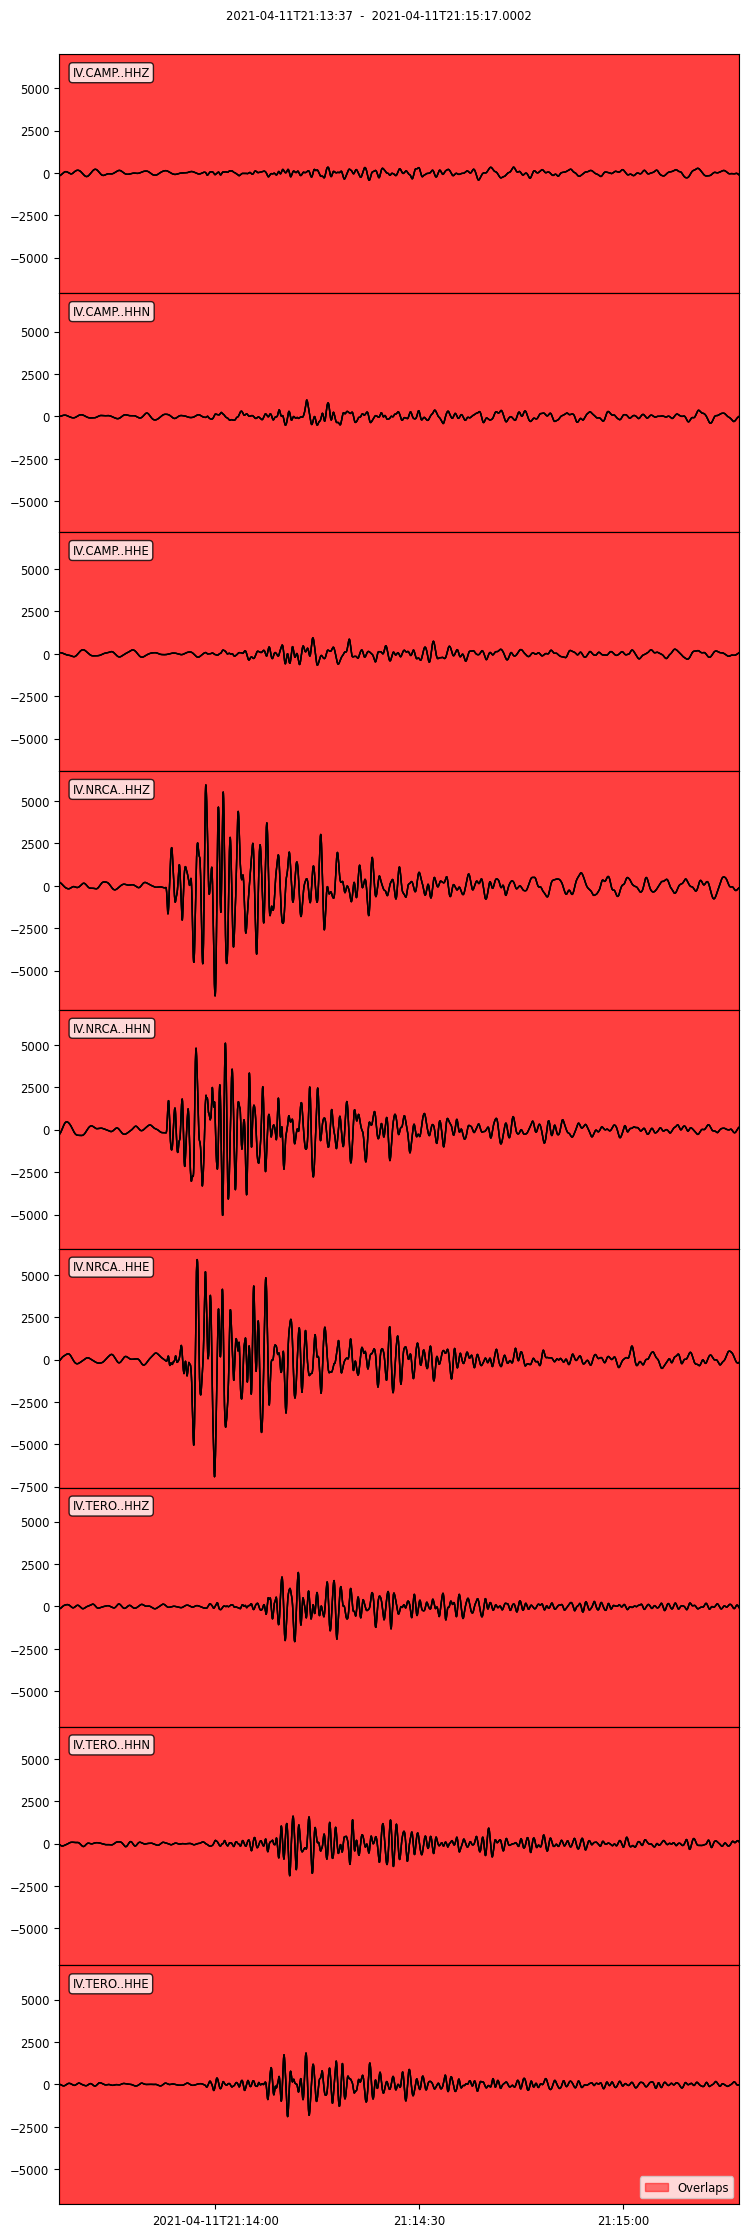

In [ ]:
# Applying the bandpass filters

Trimmed_data = Original_st_cpy.trim(starttime=giventime - 2*60, endtime=giventime + 2*60).taper(0.05)

Filtered_data = Trimmed_data.filter("bandpass", freqmin=0.05, freqmax=1)
Finaldata = Filtered_data.trim(starttime=giventime - 10, endtime=giventime + 2*45)
Finaldata.plot()                             

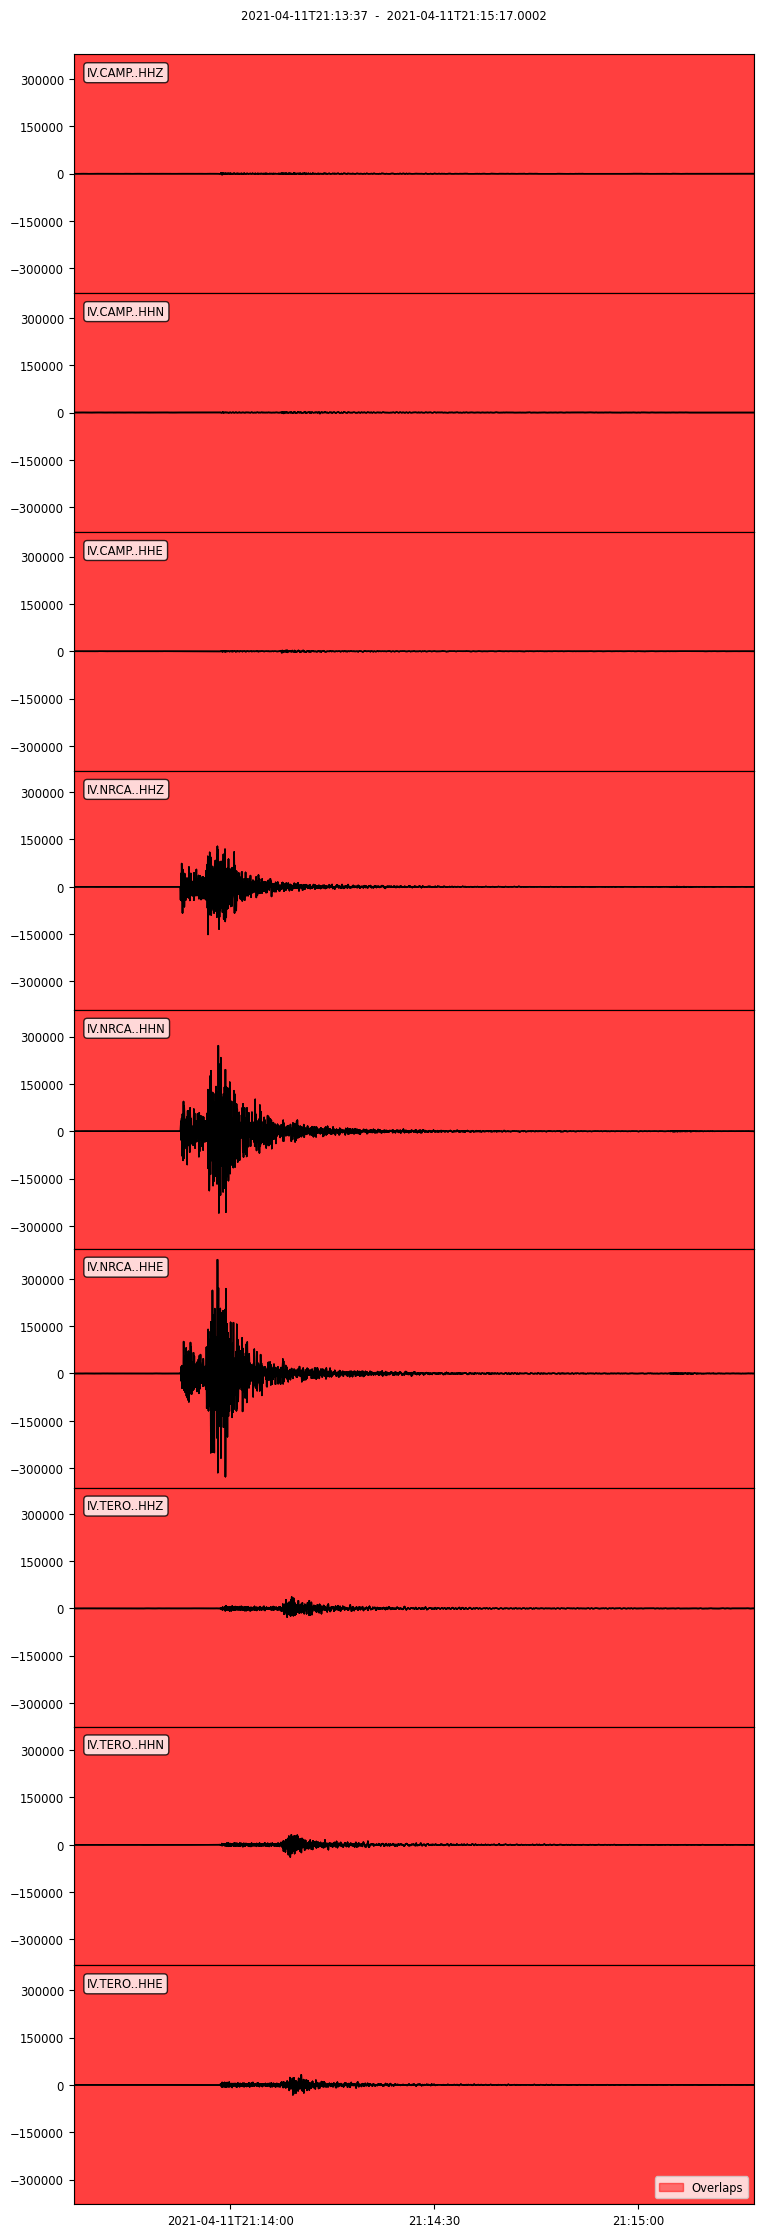

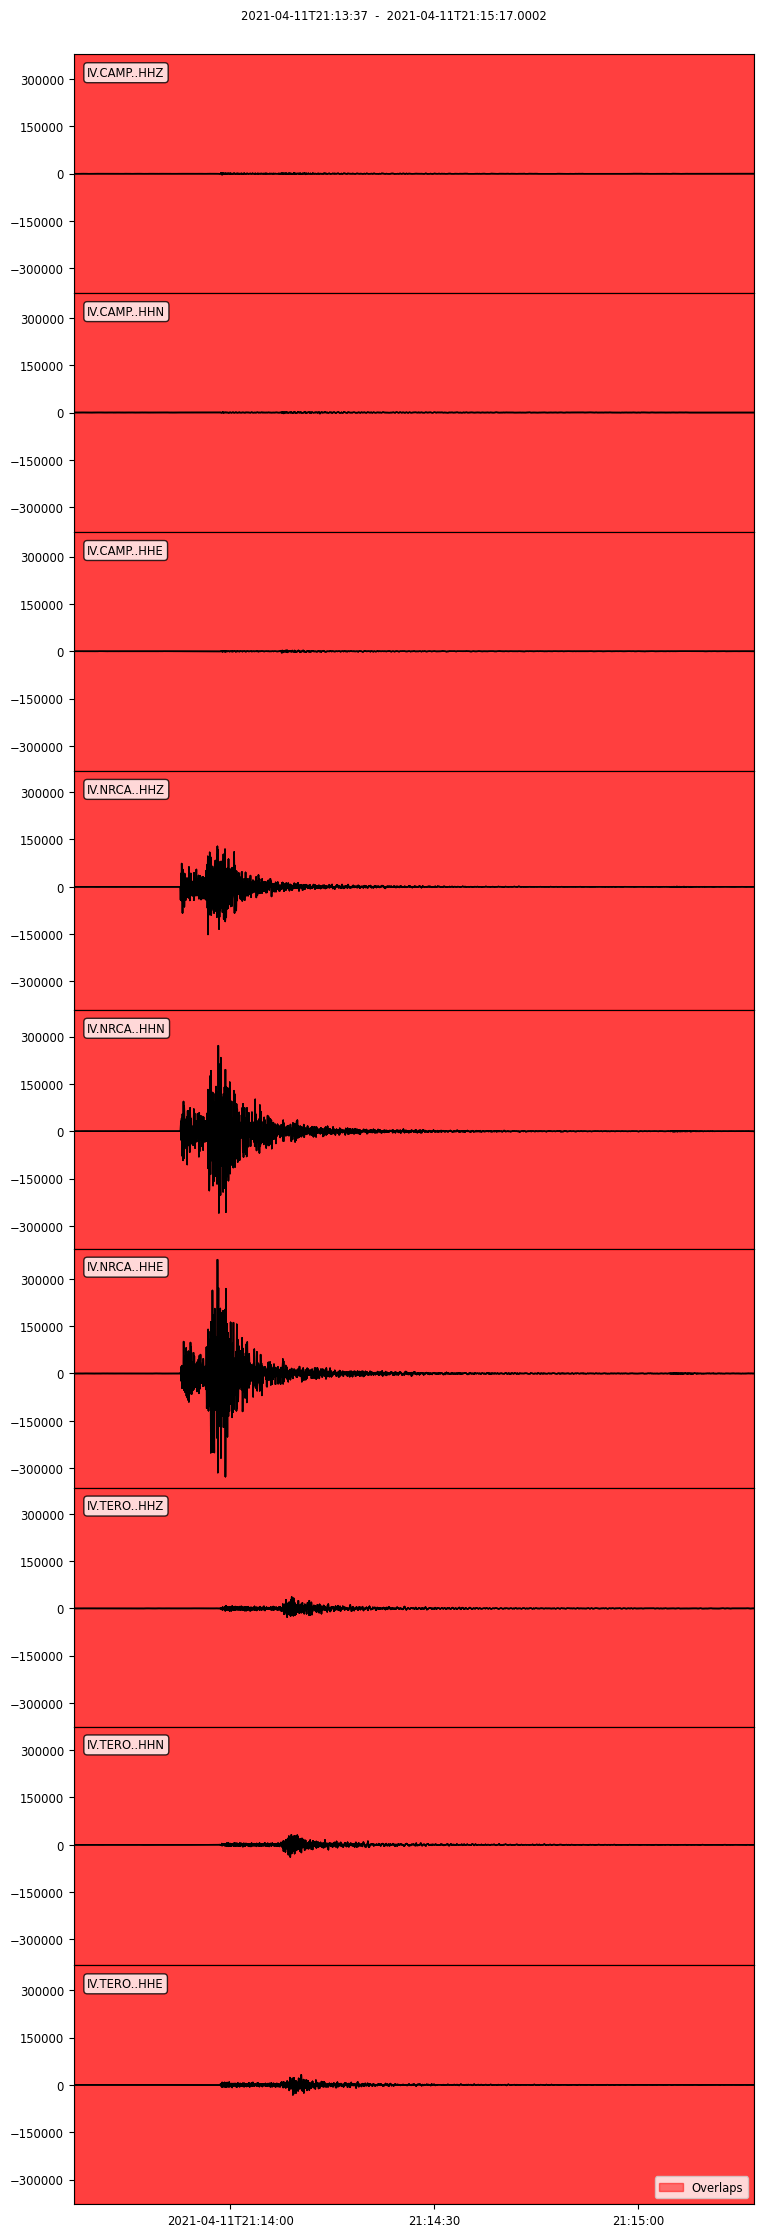

In [ ]:
#high pass filtering

highpass = Original_st.copy().trim(starttime=giventime - 2*60, endtime=giventime + 2*60).taper(0.05).filter("highpass", freq=0.5)
highpass.trim(starttime=giventime - 10, endtime=giventime + 2*45).plot()

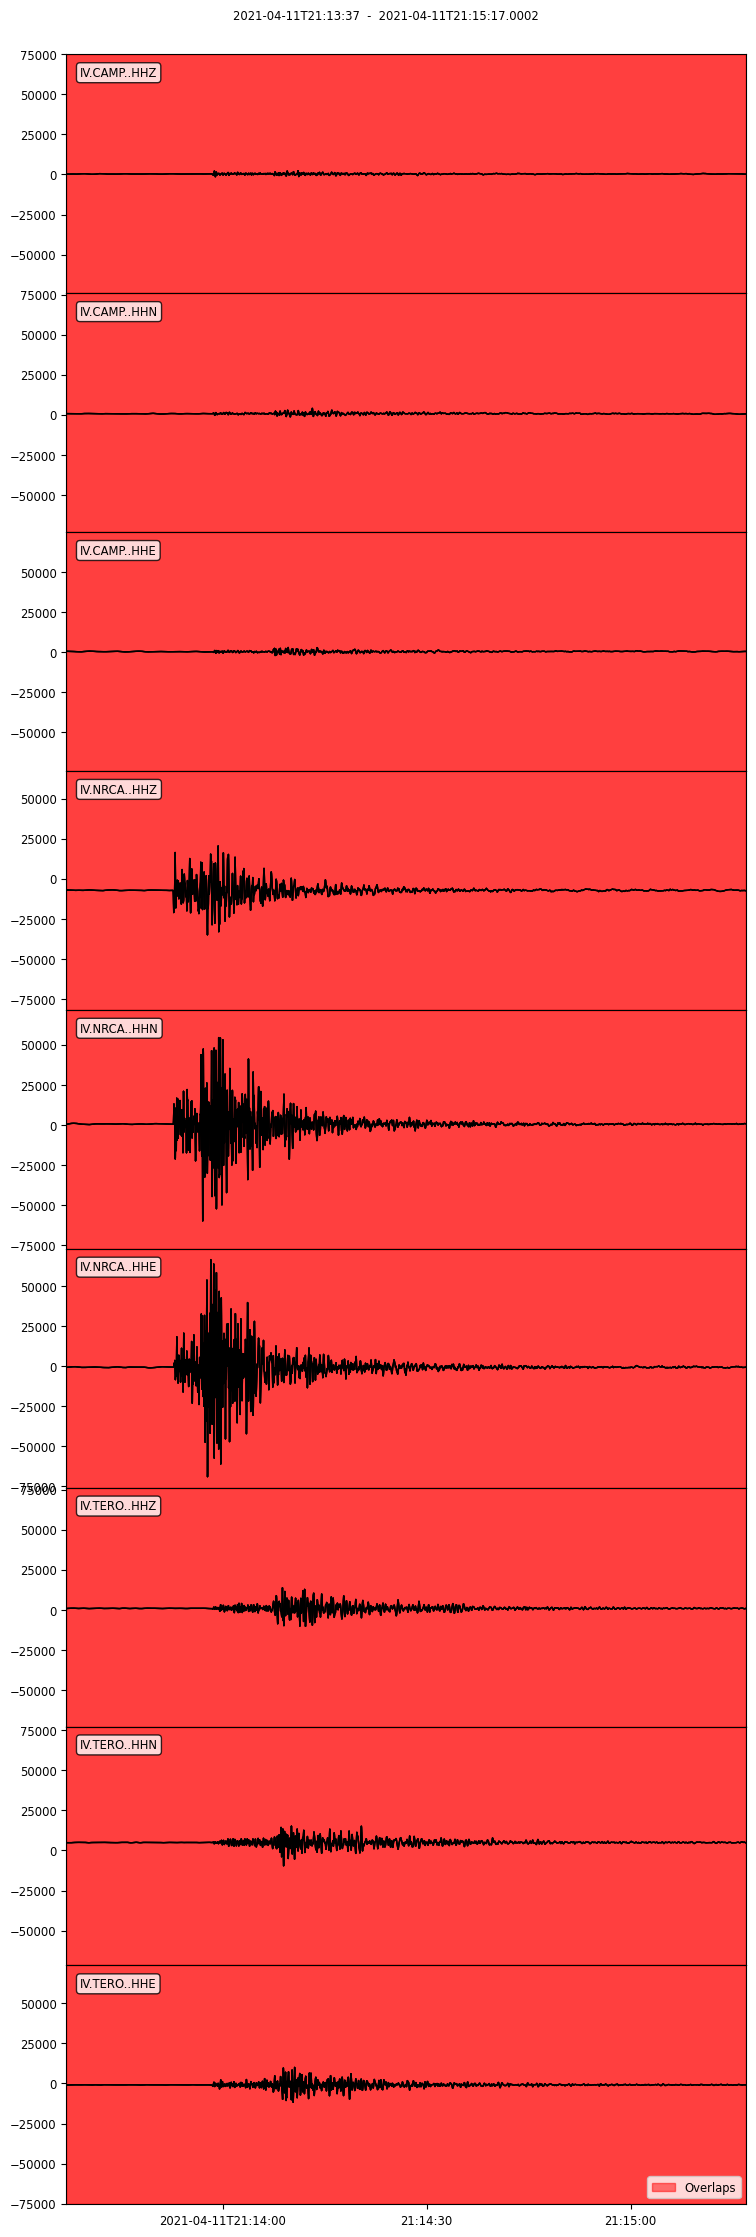

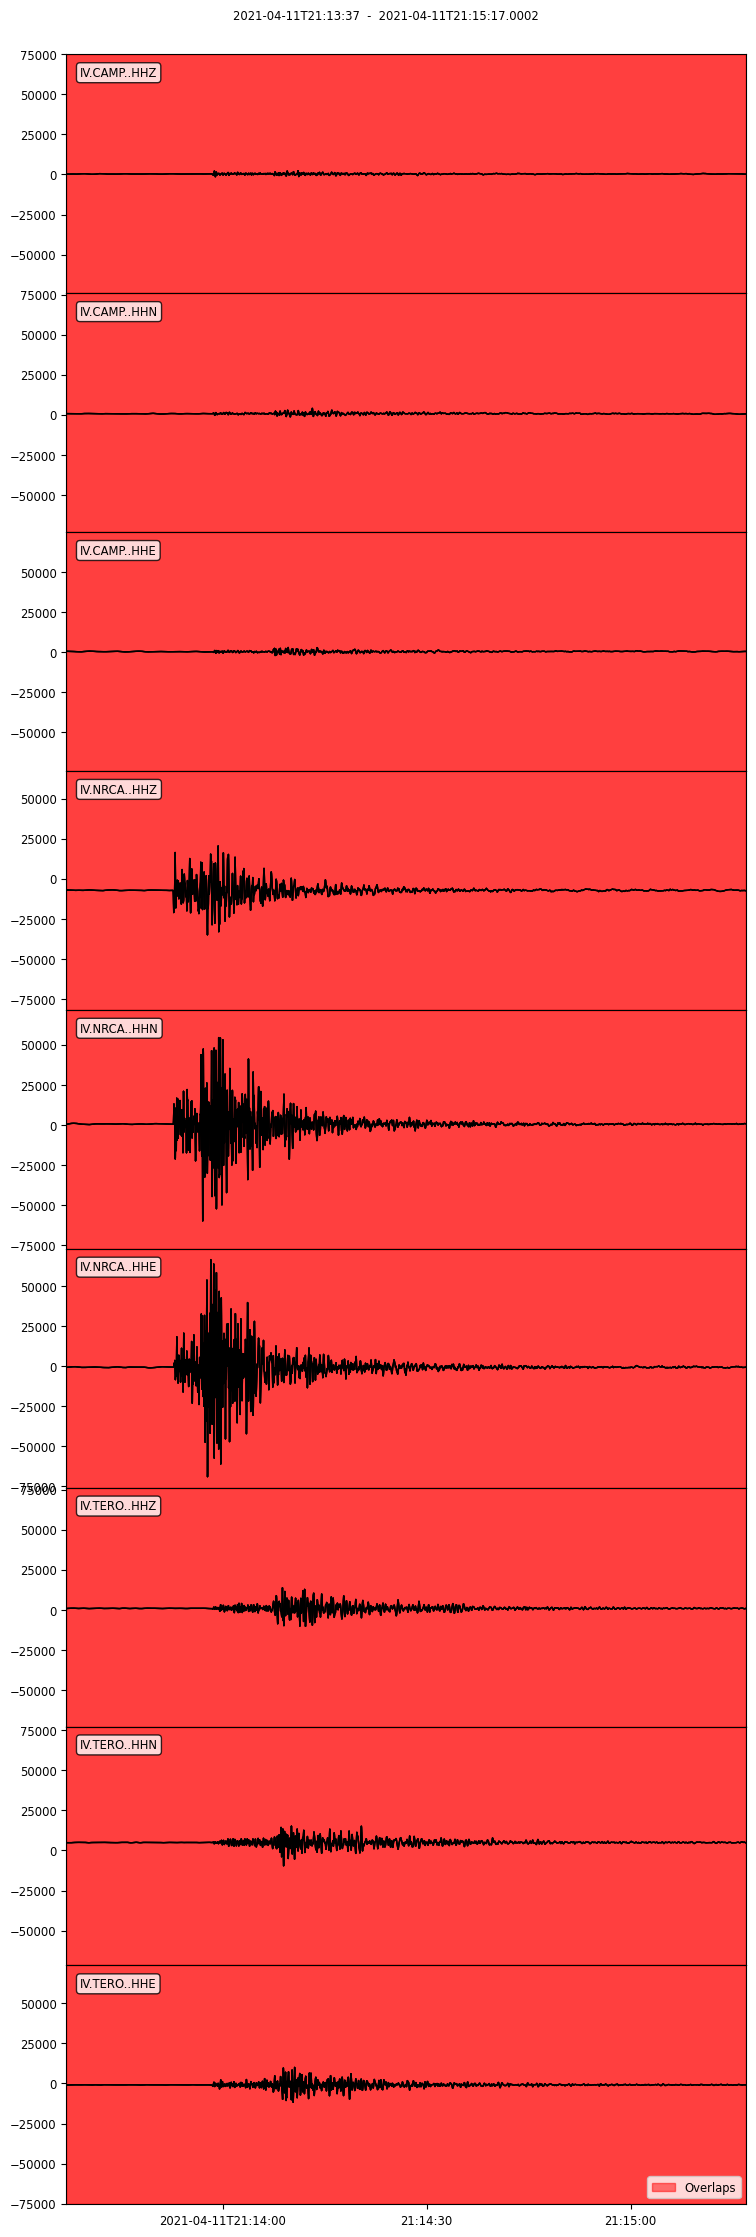

In [ ]:
#high pass filtering

#lowpass = Original_st.copy().trim(starttime=giventime - 2*60, endtime=giventime + 2*60).taper(0.05).filter("lowpass", freq=5)
#lowpass.trim(starttime=giventime - 10, endtime=giventime + 2*45).plot()

- Extract just the window of 2 minute before and 2 minute after the M3 earthquake. The origin time of the event is:  
11th April, 21:13:47  
- Apply the correct filter for the local events and plot the extracted time window.  
- Apply a filter between 0.05 and 0.1 Hz. Is the event still visible? If yes, why do you think it is?

**When preprocessing the data, we have to be careful with the order of preproccesing. The correct is:**  
- cut
- filter
- cut again the beggining and end of the data (lets say first 5 and last 5 seconds)

Plot the cut data.

---------
#### 3. Exercise

Pick the phases of the selected earthquake. Use any method available through ObsPy but remember, we need phases on every trace of the stream (every station/channel). Depending on the method you want to use, you will need to import the function from obspy!

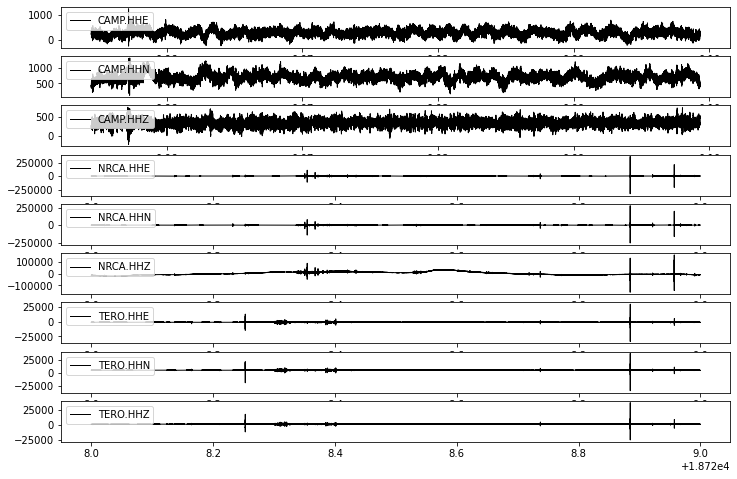

In [ ]:
st1 = read('HWwfs_dl/*')
mpl_plot(st1)

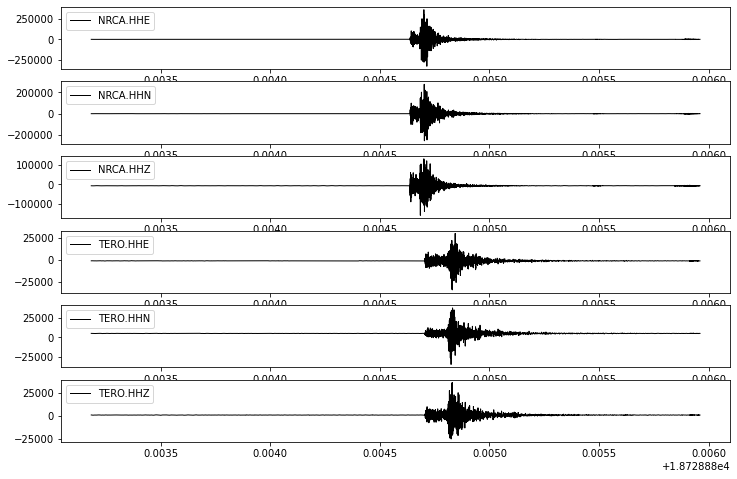

In [ ]:
# The first station of CAMP was affected by much noise and therefore ignored.
# By trimming the data, the noisy station of CAMP was automatically eliminated (I do not know how it happens)

st_event = st1.copy().trim(starttime=giventime - 2*60, endtime=giventime + 2*60)
mpl_plot(st_event)

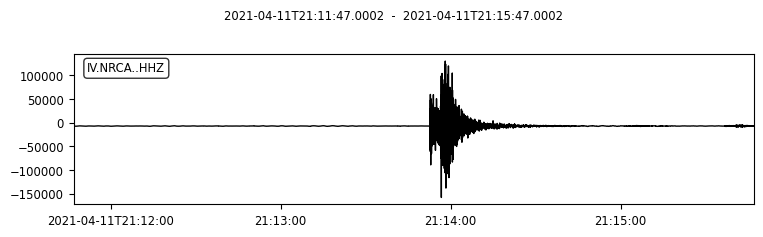

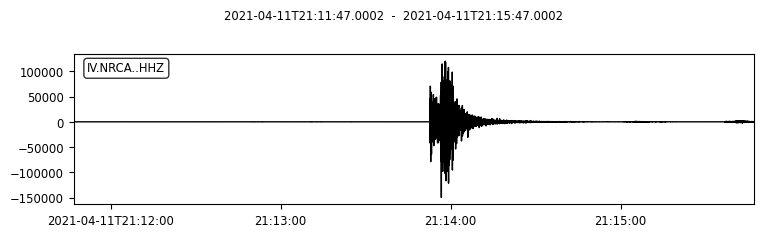

In [ ]:
# TERO station plots of Z-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="Z")[0].plot()

tr = st_event.select(component="Z")[0]
fig2 = tr.copy().filter("highpass", freq=2, corners=2).plot()

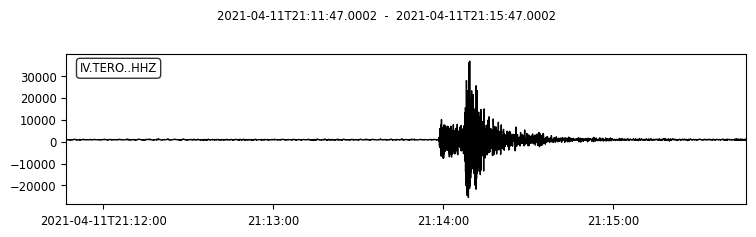

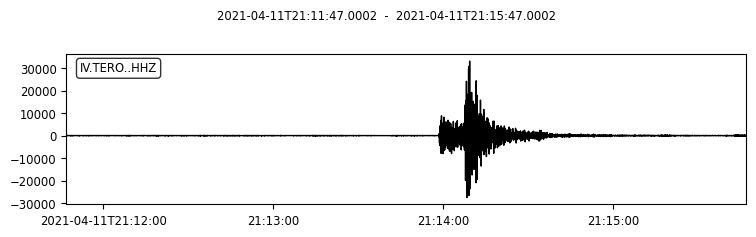

In [ ]:
# NRCA station plots of Z-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="Z")[1].plot()

tr1 = st_event.select(component="Z")[1]
fig2 = tr1.copy().filter("highpass", freq=2, corners=2).plot()

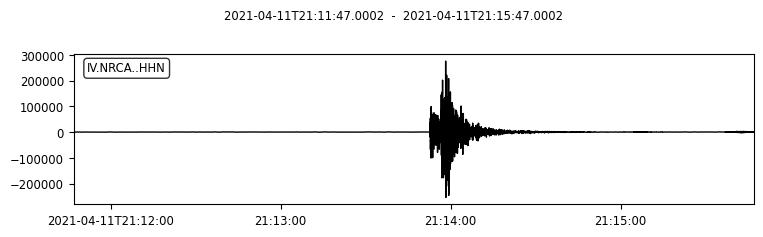

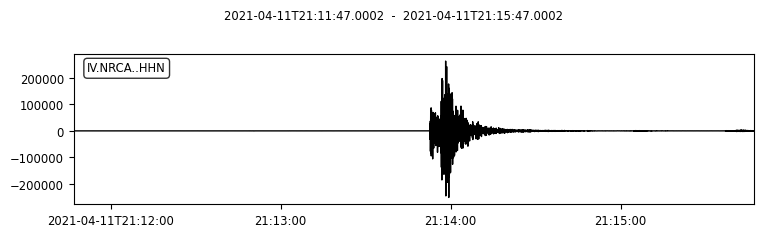

In [ ]:
# TERO station plots of N-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="N")[0].plot()

tr = st_event.select(component="N")[0]
fig2 = tr.copy().filter("highpass", freq=2, corners=2).plot()

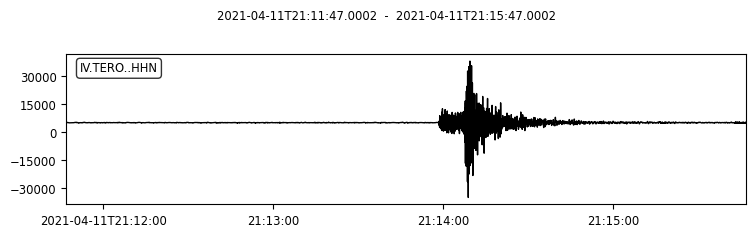

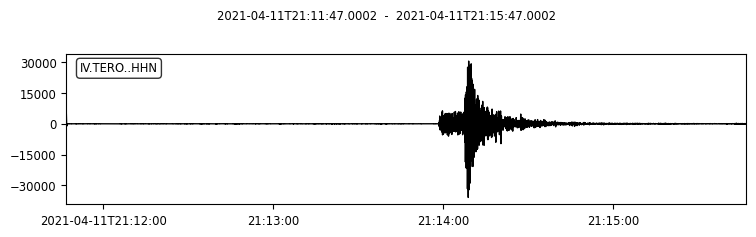

In [ ]:
# NRCA station plots of Z-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="N")[1].plot()

tr = st_event.select(component="N")[1]
fig2 = tr.copy().filter("highpass", freq=2, corners=2).plot()

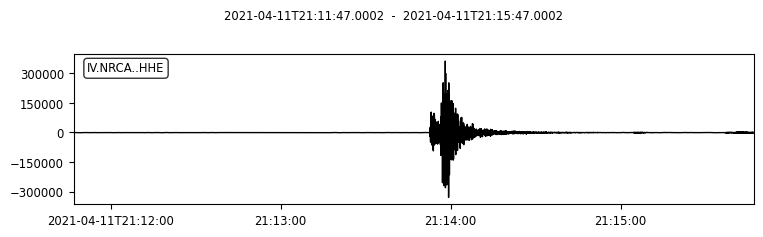

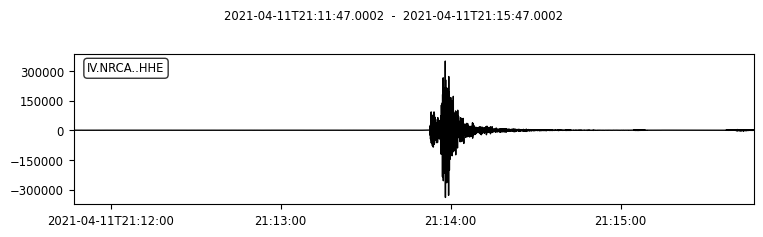

In [ ]:
# TERO station plots of E-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="E")[0].plot()

tr = st_event.select(component="E")[0]
fig2 = tr.copy().filter("highpass", freq=2, corners=2).plot()

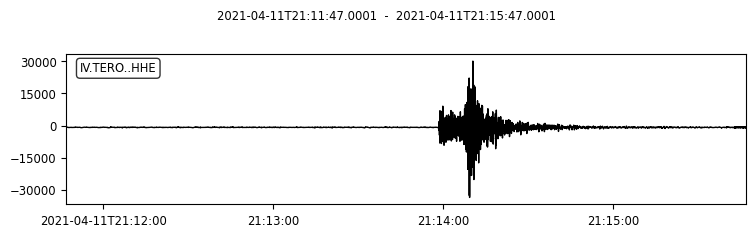

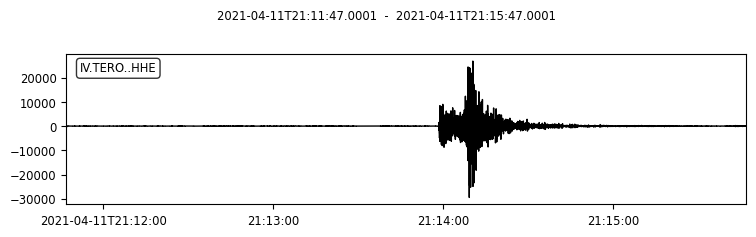

In [ ]:
# NRCA station plots of E-component for filtered and unfiltered data

fig1 = st_event.copy().select(component="E")[1].plot()

tr = st_event.select(component="E")[1]
fig2 = tr.copy().filter("highpass", freq=2, corners=2).plot()

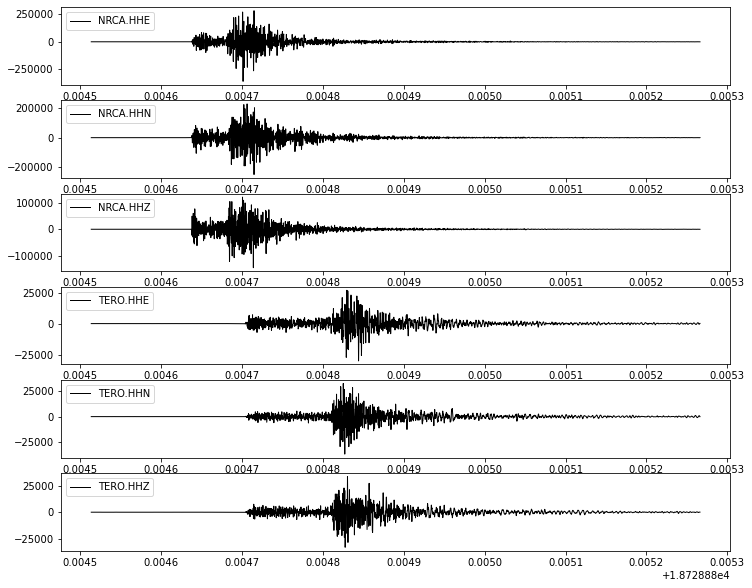

In [ ]:
#Defining the time of earthquake occurence
giventime = UTCDateTime(2021, 4, 11, 21, 13, 47)

# read in the waveforms
st_picker = st_event.copy()
st_picker.filter('bandpass', freqmin=2.0, freqmax=20.0).trim(giventime-5, giventime+60)

mpl_plot(st_picker, figsize=[12.0, 10.0], linewidth=1)

In [ ]:
'''
Lets run the ar-picker. We will store the detected P and S phases in two different dictionaries
for later use.
'''
auto_detections_p = {}
auto_detections_s = {}

# Ar-picker function requires waveforms to be split on the channels. 
st_filtered = st_picker.copy()
st_filtered_z = st_filtered.select(component='Z')
st_filtered_n = st_filtered.select(component='N')
st_filtered_e = st_filtered.select(component='E')

In [ ]:
for tr_z, tr_n, tr_e in zip(st_filtered_z, st_filtered_n, st_filtered_e):
    df = tr_z.stats.sampling_rate
    p_pick, s_pick = ar_pick(tr_z.data, tr_n.data, tr_e.data, df,2.0, 20.0, 1.0, 0.1, 3.0, 0.5, 2, 8, 0.1, 0.2)
    auto_detections_p[tr_z.stats.station] = p_pick
    auto_detections_s[tr_z.stats.station] = s_pick

In [ ]:
print('Detected P phases:\n')
pprint.pprint(auto_detections_p)
print('\nDetected S phases:\n')
pprint.pprint(auto_detections_s)

Detected P phases:

{'NRCA': 10.6899995803833, 'TERO': 16.43000030517578}

Detected S phases:

{'NRCA': 15.40999984741211, 'TERO': 26.790000915527344}


Plot the picked arrival times on the waveforms

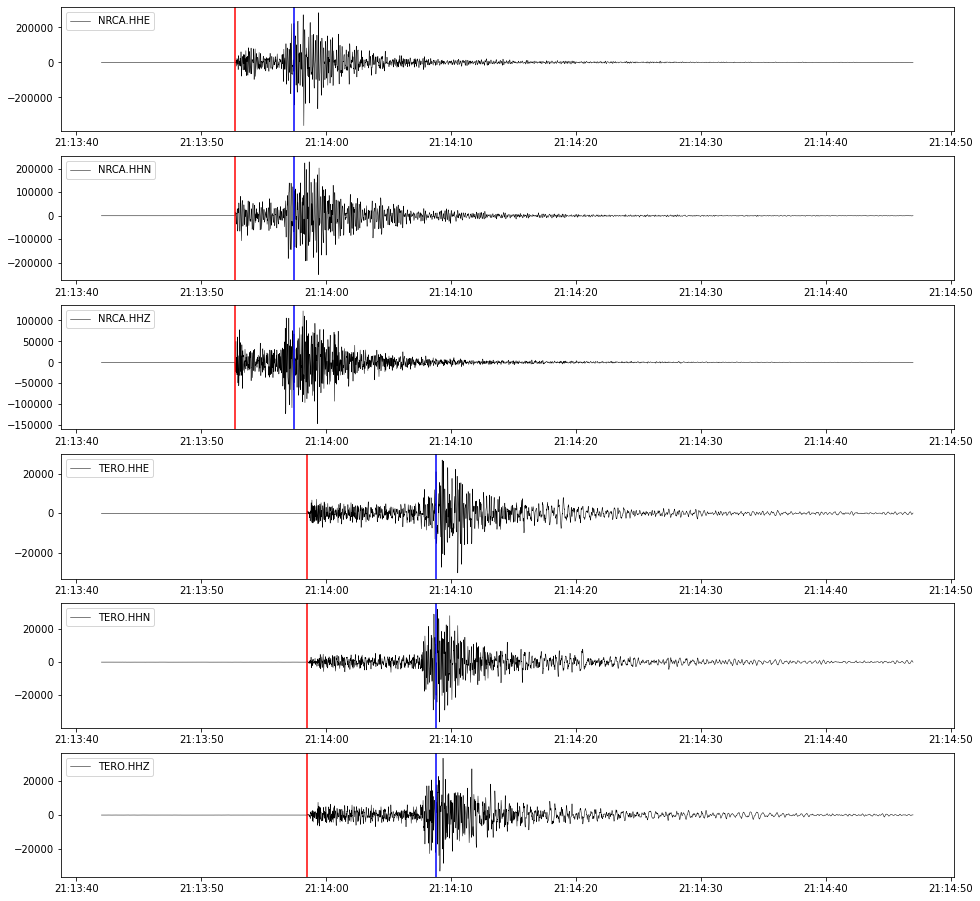

In [ ]:
# Plot of the automatic picks
fig, ax = plt.subplots(nrows=len(st_filtered), ncols=1, figsize=[16.0, 16.0])
for i, tr in zip(range(0,len(st_filtered)), st_filtered):
    ax[i].plot(tr.times("matplotlib"), tr.data, "k-", linewidth=0.5, label=tr.stats.station+'.'+tr.stats.channel)
    ax[i].axvline((tr.stats.starttime+auto_detections_p[tr.stats.station]).datetime, c='r')
    ax[i].axvline((tr.stats.starttime+auto_detections_s[tr.stats.station]).datetime, c='b')
    ax[i].legend(loc=2)

In [ ]:
giventime = UTCDateTime(2021, 4, 11, 21, 13, 47)
duration = 2 * 60
starttime = giventime - duration
endtime = giventime + duration

# Execute the get_events call to obtain predefined catalog
cat = client3.get_events(starttime, endtime)

print(cat)

2 Event(s) in Catalog:
2021-04-11T21:15:31.830000Z | +43.060,  +13.118 | 1.3 ML | manual
2021-04-11T21:13:47.650000Z | +43.050,  +13.120 | 3.1 ML | manual


In [ ]:
selected_events = cat.filter("time > 2021-04-11T21:13:30", "time < 2021-04-11T21:15:30")

print(selected_events)

1 Event(s) in Catalog:
2021-04-11T21:13:47.650000Z | +43.050,  +13.120 | 3.1 ML | manual


In [ ]:
# We already have event origins in the event we selected before.
origin_time = selected_events[0].origins[0].time
event_lat, event_lon, event_z = selected_events[0].origins[0].latitude,\
                                selected_events[0].origins[0].longitude,\
                                selected_events[0].origins[0].depth/1000

In [ ]:
# This is a predefined model, we can easily import our own
model = TauPyModel(model="iasp91")

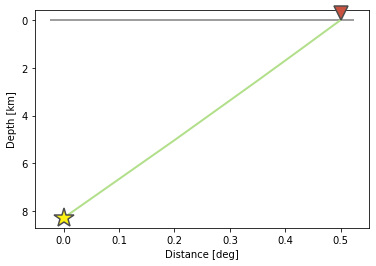

In [ ]:
# Simple plot of P and S phases for an event at depth of 15km on a station cca 50km away

arrivals = model.get_ray_paths(source_depth_in_km=event_z,
                               distance_in_degree=0.5,
                               phase_list=['p', 'S',])

fig = arrivals.plot_rays(plot_type="cartesian")

In [ ]:
# Lets calculate teoretic TT using IASP91
sl_net = read_inventory('HW_inv.xml')

ttt_p = {}
ttt_s = {}

for net in sl_net:
    for sta in net:
        sta_lat, sta_lon = sta.latitude, sta.longitude
        dists = gps2dist_azimuth(sta_lat, sta_lon, event_lat, event_lon)
        dist_km = dists[0]/1000
        dist_deg = kilometer2degrees(dist_km)
        
        arrivals = model.get_travel_times(source_depth_in_km=event_z, distance_in_degree=dist_deg)
        for arrival in arrivals:
            if arrival.name == 'p':
                ttt_p[sta.code] = arrival.time
            elif arrival.name == 's':
                ttt_s[sta.code] = arrival.time
            else:
                pass

In [ ]:
pprint.pprint(ttt_p)

{'CAMP': 10.744352037797334,
 'NRCA': 4.3785384167988601,
 'TERO': 10.740041810610137}


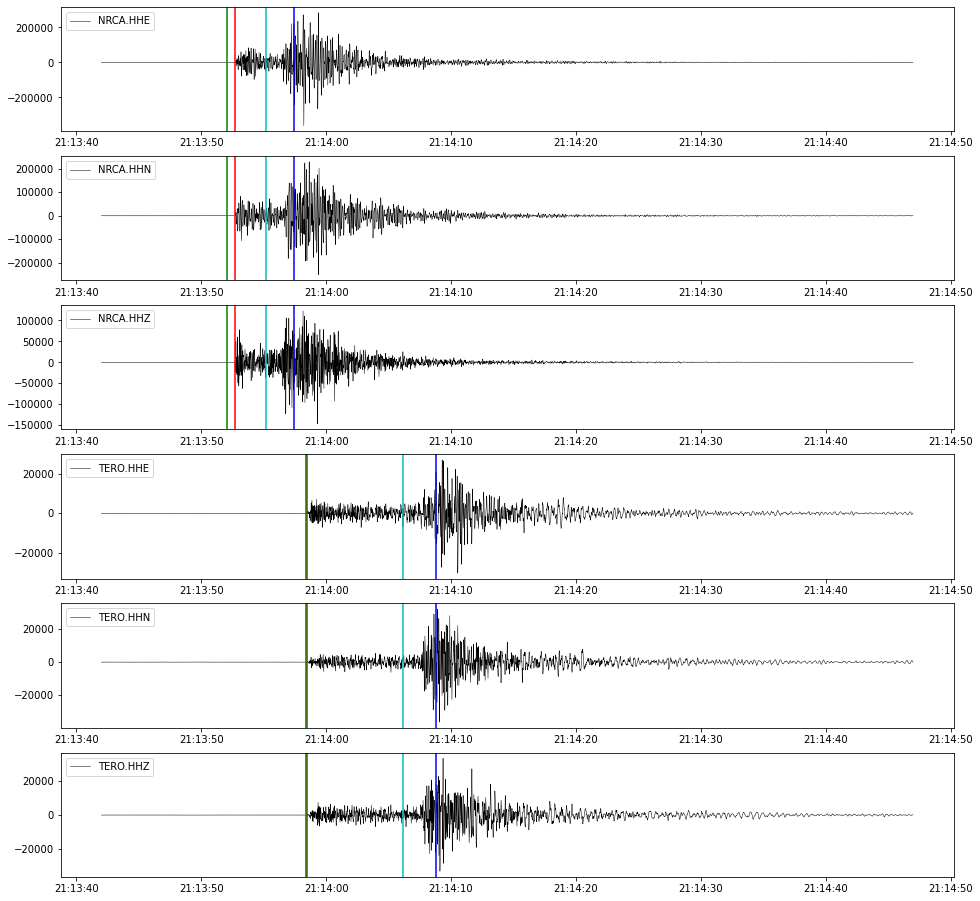

In [ ]:
# Plot automatic detections and calculated travel times
fig, ax = plt.subplots(nrows=len(st_filtered), ncols=1, figsize=[16.0, 16.0])
for i, tr in zip(range(0,len(st_filtered)), st_filtered):
    ax[i].plot(tr.times("matplotlib"), tr.data, "k-", linewidth=0.5, label=tr.stats.station+'.'+tr.stats.channel)
    ax[i].axvline((tr.stats.starttime+auto_detections_p[tr.stats.station]).datetime, c='r')
    ax[i].axvline((tr.stats.starttime+auto_detections_s[tr.stats.station]).datetime, c='b')
    
    ax[i].axvline((origin_time+ttt_p[tr.stats.station]).datetime, c='g')
    ax[i].axvline((origin_time+ttt_s[tr.stats.station]).datetime, c='c')
    ax[i].legend(loc=2)

-------
#### 4. Exercise
Calculate the magnitude of the event. You can make it simple by using next epicentral distances:  
- CESI 18.65km
- FDMO 2.54km
- NRCA 23.95km  

or calculate actual distances using Geodetic functions within Obspy.  
The magnitude is always calculated on all available channels by selecting the channel with largest amplitude, but to simplify things, select only E or N components.

use this magnitude formula:  
ml = np.log10(max_amplitude*1000) + 0.018 * epicentral_distance + 3.17

You will need a stationXML file which is attached in this folder:  
fdsn_station.xml

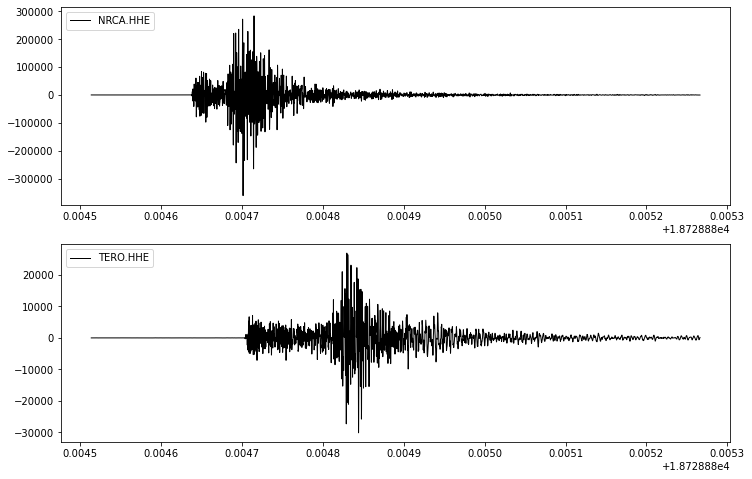

In [ ]:
st_mag = st_filtered.copy().select(channel='HHE')
mpl_plot(st_mag, figsize=[12.0, 8.0], linewidth=1)

In [ ]:
st_calc_mag = st_mag.remove_response(inventory='HW_inv.xml', output='DISP')

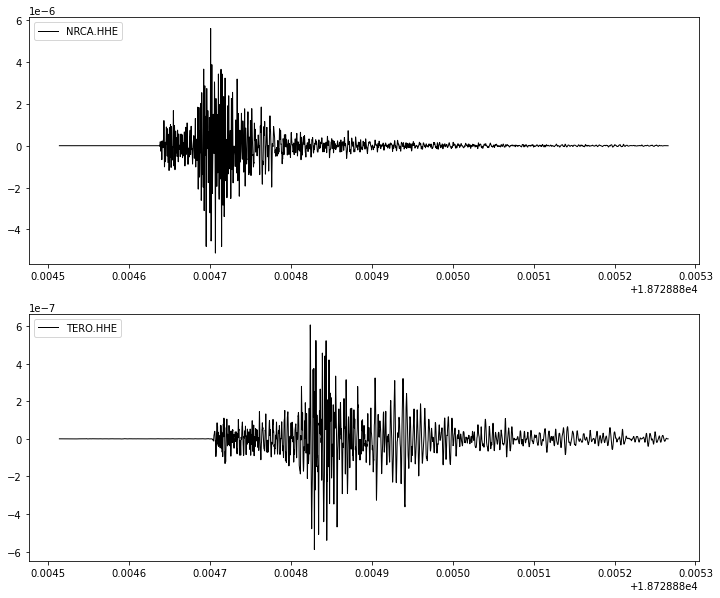

In [ ]:
mpl_plot(st_calc_mag, figsize=[12.0, 10.0], linewidth=1)

Local magnitude is: 2.86611055347


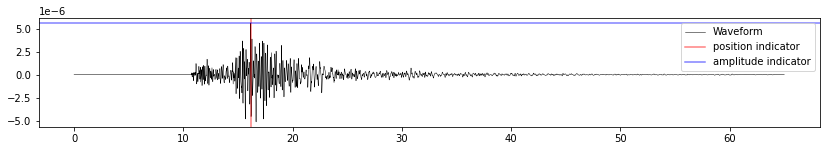

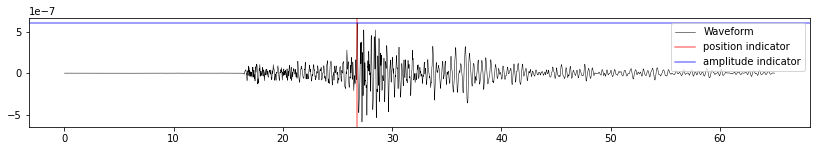

In [ ]:
mls = []
for tr in st_calc_mag:
    max_val, max_pos= max_pos_finder(tr)
    mls.append(local_mag(max_val))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14,2])
    ax.plot(tr.times(), tr.data,color='k', linewidth=0.5, label='Waveform')
    ax.axvline(x=max_pos*tr.stats.delta, color='r', alpha=0.5, label='position indicator')
    ax.axhline(y=max_val, color='b',alpha=0.5, label='amplitude indicator')
    ax.legend(loc=1)
    
print('Local magnitude is:', np.mean(mls))

--------
Questions:
1. What is a difference between Moment Magnitude and Local Magnitude?
2. Why we have to use different filltering parameters for local or teleseismic earthquakes?
3. Is seismic noise random?
4. What is the difference between absolute and relative earthquake location? 
5. Why is it good to check the earthquake catalogs with matched filter/simillarity search algorithm for the detection of earthquakes? What are its limitations?

### No. 1

Moment Magnitude is an earthquake magnitude scale which is based on the seismic moment while the Local Magnitude scale is an earthquake magnitude scale developed by Richter for shallow moderate sized local earthquakes especially in southern California.

### No. 2

Teleseismic earthquakes are mainly composed of low frequency signals and there any high frequency signal recorded in such an earthquake should be filtered. On the other hand, local earthquake signals are rich in high frequencies, therefore the filtering may have to be for low frequencies.

### No. 3

Seismic random noise are seismic signals or vibrations of differet frequencies and amplitudes in the ground generated by local activities such as road traffic, industrial work, e.t.c or sea water waves. 

### No. 4

An absolute earthquake location is one which is specified within a fixed, geographic system and a fixed time base e.g the Coordinated Universal Time (UTC) whereas a relative earthquake location is one which is specified with respect to another spatio-temporal object e.g an earthquake or explosion which itself may have an unknown or an uncertain absolute location. 

### No. 5

$\textbf{The method}$
The method operates via an algorithm that computes the correlation coefficient between a template event and a sliding window of continuous seismic records. A detection is recorded when the correlation coefficient crosses an established threshold.
<br>
It is an efficient method to detect earthquakes using waveform similarity. Simultaneous detection over multiple stations enables the identification of very weak earthquake signals; summing cross-correlation values over the network makes it easier to separate the signal from noise without incurring significant false detections. It is relatively straightforward to extend template matching to multiple channels and stations.
<br>
It is good to check the earthquake catalogs with matched filter/simillarity search algorithm to determine the efficiency and effectiveness of the search in order to identify posssibility of false detections.
<br>
$\textbf{The limitations}$
It requires prior knowledge of waveform signatures i.e requires precise information about the signals we wish to detect, in the form of a library of template waveforms; this makes it highly sensitive but also limited to detecting events with known sources and in areas with an existing seismicity catalogue
<br>
Simultaneous detection over multiple stations enables the identification of very weak earthquake signals (Peng & Zhao 2009); summing cross-correlation values over the network makes it easier to separate the signal from noise without incurring significant false detections. It is relatively straightforward to extend template matching to multiple channels and stations.

In [ ]:
%%shell
jupyter nbconvert --to html ../Exercises.ipynb

[NbConvertApp] WARNING | pattern '../Exercises.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

CalledProcessError: ignored

In [ ]:
!pwd

/content
